In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv("./data/08_wine.csv")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [32]:
X = data[["alcohol", "sugar", "pH"]].to_numpy()
Y = data["class"].to_numpy()
X.shape, Y.shape

((6497, 3), (6497,))

In [33]:
X = data.iloc[:,:3].to_numpy()
Y = data["class"].to_numpy()
X.shape, Y.shape

((6497, 3), (6497,))

In [36]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-0.91546416, -0.7447781 ,  1.81308951],
       [-0.58006813, -0.59764007, -0.11507303],
       [-0.58006813, -0.66069923,  0.25811972],
       ...,
       [-0.91546416, -0.89191614, -1.42124765],
       [ 1.9354021 , -0.91293585,  0.75571005],
       [ 1.09691202, -0.97599501,  0.25811972]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [49]:
param_grid = {
    "n_init" : [10, 30, 50],          # 초기 군집의 중심점을 몇번에 걸쳐서 재계산하면서 이돌할지 횟수 지정
    "max_iter" : [10, 30, 50, 100],   # 최대 반복 횟수 설정
    "tol" : [0.0001, 0.001, 0.01, 1] # 훈련 종료를 위한 기준값 설정 -> 중심점의 이동이 기준값보다 작으면 훈련을 종료 시킴
}

n_clusters = 2  # 군집(범주)의 갯수 정의 -> 몇개의 클러스터(군집, 범주)로 나눌지 지정

# cv 모델 설정값 정의
cv = 5
scoring = "accuracy"

In [50]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)


In [51]:
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=cv, scoring=scoring)
grid_search

GridSearchCV(cv=5, estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'max_iter': [10, 30, 50, 100], 'n_init': [10, 30, 50],
                         'tol': [0.0001, 0.001, 0.01, 1]},
             scoring='accuracy')

In [52]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KMeans(n_clusters=2, random_state=42),
             param_grid={'max_iter': [10, 30, 50, 100], 'n_init': [10, 30, 50],
                         'tol': [0.0001, 0.001, 0.01, 1]},
             scoring='accuracy')

In [53]:
best_model = grid_search.best_estimator_

In [57]:
test_pred = best_model.predict(X_test)
train_pred = best_model.predict(X_train)

In [59]:
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

train_acc, test_acc, train_acc - test_acc

(0.457379257263806, 0.45076923076923076, 0.006610026494575261)

In [64]:
data_v = {
    "alcohol" : X_test[:, 0],
    "sugar" : X_test[:, 1],
    "pH" : X_test[:, 2],
    "class" : y_test[:],
    "cluster" : test_pred[:],
}

test_data = pd.DataFrame(data = data_v)

In [65]:
test_data

,alcohol,sugar,pH,class,cluster
0,-1.250860,2.355630,0.133722,1.0,0
1,0.593818,-0.912936,-0.799260,1.0,1
2,-0.831615,0.579464,-0.363868,1.0,0
3,-1.502407,2.597357,0.631312,1.0,0
4,-0.747766,-0.198265,-1.234651,1.0,0
...,...,...,...,...,...
1295,-0.831615,-0.744778,-0.550465,0.0,1
1296,1.683855,-0.177246,1.128903,1.0,1
1297,-0.580068,-0.681719,-0.426067,0.0,1
1298,-0.747766,1.840647,-0.612663,1.0,0


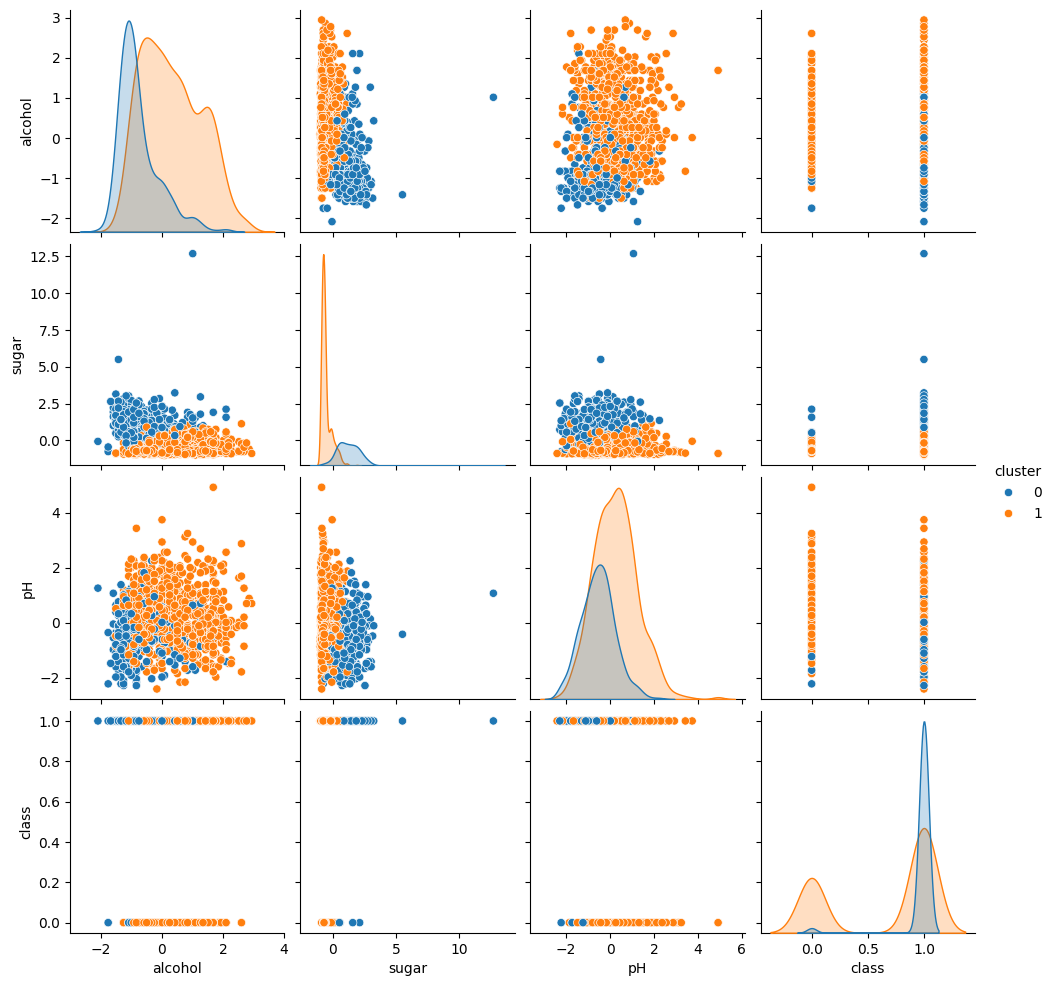

In [66]:
# 산점행렬도로 시각화하기
sns.pairplot(test_data, hue="cluster")
plt.show()